## Homework #1 
# CP 2.5, 2.6b,c, 2.9, 3.6, 3.7
Newton Kwan
<br>
Professor Walter
<br>
PHY 566
<br>
21 January 2018 

In [4]:
from math import sqrt 
from math import pi
from numpy.polynomial import Polynomial as P 
from numpy import empty, array, linspace, zeros
from pylab import scatter, show, xlabel, ylabel, title, imshow
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### CP 2.5 -- Quantum Potential Step

A particle of mass m encounters a one-dimensional potential step and has the probabilities T and R for transmission and reflection. These are given by 

$$T = \frac{4k_1k_2}{(k_1+k_2)^2}, \qquad R = \left(\frac{k_1-k_2}{k_1+k_2}\right)^2$$

We will calculate the probabilty of transmission T and reflection R for a particle of mass $m = 9.11\times10^-31$ and energy 10 eV that encounters a potential step of height 9 eV. 

In [5]:
m = 9.11e-31
E = 10 * 1.602e-19
V = 9 * 1.602e-19
hbar = 1.0545718e-34
k1 = sqrt(2*m*E) / hbar 
k2 = sqrt(2*m*(E - V)) / hbar 
T = 4 * k1 * k2 / (k1 + k2)**2
R = ((k1-k2)/(k1+k2))**2

print("Transmission probability is", T)
print("Reflection probability is", R)

Transmission probability is 0.7301261363877618
Reflection probability is 0.26987386361223825


### CP 2.6 (b) and (c) -- One Body Orbits
We write a user defined function that prints out the period and eccentricity for both Earth and Halley's comet given the perihelion $l_1$ and its linear velocity $v_1$

The parameters that we use are the following:

\begin{align*}
\text{Semi-major axis:} \qquad a &= \frac{1}{2}(l_1 + l_2), \\
\text{Semi-minor axis:} \qquad b &= \sqrt{l_1l_2}, \\ 
\text{Orbital period:} \qquad T &= \frac{2\pi ab}{l_1v_1}, \\
\text{Orbital eccentricity:} \qquad e &= \frac{l_2-l_1}{l_2+l_1}
\end{align*}

#### 2.6.b 

In [6]:
#write a user defined function to calculate the distance to the sun
#and velocity at perihelion and calculates and prints
#the quantities l2, v2, T, and e


def velocity2(l1, v1):
    p = P([-((v1**2) - (2*G*M/l1)), -2*G*M/v1/l1, 1])
    roots = sorted(p.roots()) #ensures the lowest root is first
    return roots[0]
def length2(l1, v1):
    v2 = velocity2(l1, v1)
    l2 = l1*v1 / v2 
    return l2
def semiMajorAxis(l1, l2):
    a = (1/2) * (l1 + l2)
    return a 
def semiMinorAxis(l1, l2):
    b = sqrt(l1*l2)
    return b
def orbitalPeriod(l1, v1):
    a = semiMajorAxis(l1, l2)
    b = semiMinorAxis(l1, l2)
    T = 2*pi*a*b / (l1*v1)
    return T
def eccentricity(l1, l2):
    ecc = (l2 - l1) / (l2 + l1)
    return ecc
def orbitinformation(l1, l2, v1, v2, G, M): 
    ''' This function prints out the information about 
    the orbit in space of one body around another'''
    #print("The velocity 2 is", v2, "m/s")
    #print("The length 2 is", l2, "meters")
    print("The semi-major axis is", semiMajorAxis(l1, l2), "meters")
    print("The semi-minor axis is", semiMinorAxis(l1, l2), "meters")
    print("The orbital period is", orbitalPeriod(l1, v1), "seconds or", orbitalPeriod(l1, v1) / 60 / 60 / 24 / 365, "years")
    print("The eccentricity is", eccentricity(l1, l2))
    

#### For Earth

In [7]:
l1 = 1.4710e11 #meters
v1 = 3.0287e4 #m/s
M = 1.9891e30 #kg mass of the sun
G = 6.6738e-11 #m^3kg^-1s^-2; Newton's gravitational constant
v2 = velocity2(l1, v1)
l2 = length2(l1, v1)
print("For Earth")
print()
orbitinformation(l1, l2, v1, v2, G, M)

For Earth

The semi-major axis is 149563598604.0 meters
The semi-minor axis is 149543307136.74176 meters
The orbital period is 31543060.2079 seconds or 1.00022387772 years
The eccentricity is 0.0164719131347


#### For Halley's Comet 

In [8]:
l1 = 8.7830e10 #meters
v1 = 5.4529e4 #m/s
M = 1.9891e30 #kg mass of the sun
G = 6.6738e-11 #m^3kg^-1s^-2; Newton's gravitational constant
v2 = velocity2(l1, v1)
l2 = length2(l1, v1)
print("For Halley's Comet")
print()
orbitinformation(l1, l2, v1, v2, G, M)

For Halley's Comet

The semi-major axis is 2.68502233044e+12 meters
The semi-minor axis is 681129146098.4297 meters
The orbital period is 2399312511.85 seconds or 76.0817006547 years
The eccentricity is 0.967288912645


### 2.9 Madelung's Constant 

In condensed matter physics the Madelung constant gives the total electric potential felt by an atom in a solid. We solve for the Madelung constant in a sodium chloride crystal, but with alternating sodium and chlorine atoms, the sodium ones having a single positive charge $+e$ and the cholorine ones a single negative charge $-e$, where $e$ is the charge on the electron. Labelling each position on the lattice by three integer coordinates $(i,j,k)$, then the sodium atoms fall at positions where $i+j+k$ is even, and the chlorine atoms at positions where $i+j+k$ is odd. 

The equation for the total electric potential is given by: 

$$ \sum_{i,j,k=-L, not i=j=k=0}^{L} V(i,j,k) = \frac{e}{4\pi\epsilon_0a}M$$

where M is Madelung's constant

In [9]:
'''This generates the possible coordinates for the atoms in a 
sodium chloride crystal arranged on a cubic lattice
'''
L = 100
coordinates = [] 
for i in range(0, L+1):
    for j in range(0, L+1):
        for k in range(0, L+1):
            if i == 0 and j == 0 and k == 0:
                continue 
            coords = (i, j, k)
            coordinates.append(coords)
            coords = (-i, -j, -k)
            coordinates.append(coords)
            coords = (i, -j, -k)
            coordinates.append(coords)
            coords = (-i, j, -k)
            coordinates.append(coords)
            coords = (-i, -j, k)
            coordinates.append(coords)
            coords = (-i, j, k)
            coordinates.append(coords)
            coords = (i, -j, k)
            coordinates.append(coords)
            coords = (i, j, -k)
            coordinates.append(coords)
            
coordinates = list(set(coordinates))  #this ensures no points are double counted          
#print(coordinates)
print(len(coordinates))

8120600


In [11]:
def MadelungConstant(coordinates):
    ''' This function calculates the Madelung constant 
    for a sodium chloride crystal arranged on a cubic 
    lattice. It takes the coordinates of the atoms 
    surrounding an atom centered at (0,0,0)'''
    M = 0 
    for item in coordinates: 
        i = item[0]
        j = item[1]
        k = item[2]
        m = 1 / sqrt((i**2 + j**2 + k**2))
        if sum(item) % 2 == 0:
            M += m
        else: 
            M -= m 
    return M
            
    
print("The Madelung constant is", MadelungConstant(coordinates))

The Madelung constant is -1.7418198158417173


### 3.6 Deterministic chaos and the Feigenbaum plot

We try to calculate and display the logistic map for the logistic map defined by the equation $$x' = rx(1-x)$$

In [12]:
def logisticEq(x, r):
    ''' define a logistic function'''
    xprime = r*x*(1-x)
    return xprime 

In [13]:
xvalues = [] 
rvalues = []
def logisticMap(x, r):
    '''This function returns a tuple of lists of x and r 
    values given some initial x and r value'''
    iterations = 2000
    for i in range(0,iterations,1):
        xprime = logisticEq(x,r)
        xvalues.append(xprime)
        rvalues.append(r)
        x = xprime
        if len(xvalues) == iterations: 
            break 
    return xvalues, rvalues  

#### Constant r value 

Text(0.5,1,'Feigenbaum plot of r vs x')

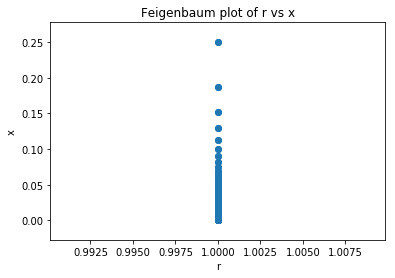

In [14]:
r = 1
x = 1 / 2 
#print(logisticMap(x,r)[1])
xrange = np.linspace(-1,1,2000)
scatter(logisticMap(x,r)[1], logisticMap(x,r)[0])
xlabel("r")
ylabel("x")
title("Feigenbaum plot of r vs x")

#### r value from 1 to 4 with interval 0.01 

Text(0.5,1,'Feigenbaum plot of r vs x')

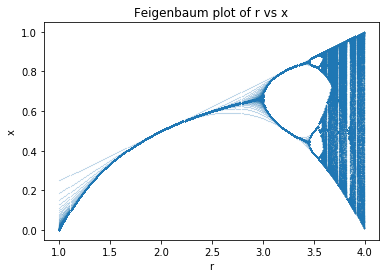

In [15]:
r = np.arange(1, 4, 0.01)
x = 1/2
rvalues = []
xvalues = [] 
#print(r)
for i in r: 
    logisticMap(x, i)
scatter(rvalues, xvalues, s = 0.01)
xlabel("r")
ylabel("x")
title("Feigenbaum plot of r vs x")

#### a) 
Given the value of r, a fixed point would look like something in 1.75 < r < 2.4. A limit cycle of 2 would look like something in 2.8 < r < 3.4. Chaos would look like somethig in 3.7 < r < 4.0.

#### b) 
Based on my plot, at the value of around r = 3.5 is when the system moves from orderly limit cycles to chaotic behavior. This would be considered the edge of chaos. 

## 3.7 Mandelbrot set 

Mandelbrot equation 

$$ z' = z^2 + c $$ 

where $z$ is a complex number and $c$ is a complex constant

We make an image of the Mandelbrot set by performing the iteration for all values of $c = x + iy$ on an $N\times N$ grid spanning the region where $-2\leq x \leq 2$ and $-2\leq y \leq 2$


Text(0,0.5,'x')

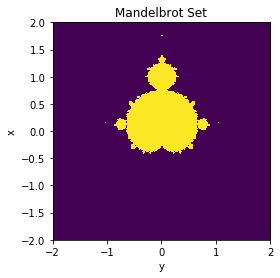

In [17]:
#make an empty array
points = 3000
iterations = 100
xi = zeros([points, points], float)
xvalues = array(linspace(-2, 2, points), float)
yvalues = array(linspace(-2, 2, points), float)

z = 0
for i in range(points):
    x = xvalues[i] 
    for j in range(points): 
        y = yvalues[j]
        c = x + y*1j
        z = 0
        for k in range(iterations):
            zprime = z**2 + c 
            z = zprime
            #print(z)
            #print(abs(z))
            if abs(z) > 2:
                break
        if abs(z) < 2:
            xi[i,j] = 1

#print(xi)
imshow(xi, extent =[-2, 2, -2, 2])
title("Mandelbrot Set")
xlabel("y")
ylabel("x")